# Test SAM Indeces Calc

Nicki did a convincing write up of the method to apply here:

https://github.com/nickywright/palaeoclimate-lastmillennium/blob/master/SAM%20-%20Marshall%20(2003).ipynb

1. Grab PSL and 40S and 65S for all lon
2. Calculate latitdue means for each month
3. Normalise based on 1971 to 2000 for each lat
4. Sam index is then the difference between the normalised lasts (P40-P65)

In [1]:
import sys
sys.path.append(sys.path[0]+'/../..')


import helpers.fileHandler as fh
import utils.pslIndex as psl

In [2]:
import matplotlib.pyplot as plt
import numpy
import cftime
import xarray

First load up the cvdp and figure out the details of the index we want to calculate

In [3]:
ds1 = fh.loadModelData('CESM-LME', 'PSL', '002', drop_variables=('hyam', 'hybm', 'hyai', 'hybi', 'P0', 'date', 'n2ovmr','datesec','w_stag','time_bnds', 'date_written', 'time_written', 'ntrm', 'ntrn', 'ntrk','ndbase', 'nsbase', 'nbdate', 'nbsec', 'mdt', 'nlon', 'wnummax', 'gw', 'ndcur', 'nscur', 'co2vmr', 'ch4vmr', 'n20vmr', 'f11vmr', 'f12vmr', 'sol_tsi', 'nsteph' ))
ds2 = fh.loadModelData('CESM-LME', 'PSL', 'LME.002', drop_variables=('hyam', 'hybm', 'hyai', 'hybi', 'P0', 'date', 'n2ovmr','datesec','w_stag','time_bnds', 'date_written', 'time_written', 'ntrm', 'ntrn', 'ntrk','ndbase', 'nsbase', 'nbdate', 'nbsec', 'mdt', 'nlon', 'wnummax', 'gw', 'ndcur', 'nscur', 'co2vmr', 'ch4vmr', 'n20vmr', 'f11vmr', 'f12vmr', 'sol_tsi', 'nsteph' ))

Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/mon/PSL/b.e11.BLMTRC5CN.f19_g16.002.cam.h0.PSL.085001-184912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/PSL/b.e11.BLMTRC5CN.f19_g16.002.cam.h0.PSL.185001-200512.nc']
Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/mon/PSL/b.e11.BRCP85C5CN.f19_g16.LME.002.cam.h0.PSL.200601-210012.nc']


In [4]:
ds=xarray.concat([ds1, ds2], dim='time')

In [5]:
ds

<xarray.Dataset>
Dimensions:  (ilev: 31, lat: 96, lev: 30, lon: 144, slat: 95, slon: 144, time: 15012)
Coordinates:
  * ilev     (ilev) float64 2.255 5.032 10.16 18.56 ... 947.4 967.5 985.1 1e+03
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * slat     (slat) float64 -89.05 -87.16 -85.26 -83.37 ... 85.26 87.16 89.05
  * slon     (slon) float64 -1.25 1.25 3.75 6.25 ... 348.8 351.2 353.8 356.2
  * time     (time) object 0850-01-31 00:00:00 ... 2100-12-31 00:00:00
Data variables:
    PSL      (time, lat, lon) float32 dask.array<chunksize=(12000, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.BLMTRC5CN.f19_g16.002
    title:                     UNSET
    logname:                   mai
    host:                      ys0137
    Version:                   $Name$
    revision_Id:               $Id$
    initial_file:              b.e11.B1850C5CN.f19_g16.0850cntl.001.cam.i.085...
    topography_file:           /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/...
    history:                   Tue Jan 28 10:21:23 2014: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [6]:
sam=psl.calculateSamIndex(ds, 1961, 1990)

C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 417 times more chunks
  return self.array[key]
C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 417 times more chunks
  return self.array[key]


In [7]:
sam

<xarray.Dataset>
Dimensions:  (time: 15012)
Coordinates:
  * time     (time) object 0850-01-31 00:00:00 ... 2100-12-31 00:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sam      (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>

In [8]:
sam.values()

ValuesView(<xarray.Dataset>
Dimensions:  (time: 15012)
Coordinates:
  * time     (time) object 0850-01-31 00:00:00 ... 2100-12-31 00:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sam      (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>)

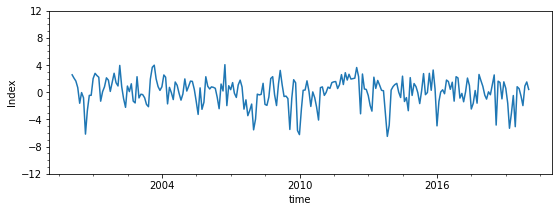

In [9]:

#The result should be the same as 
# https://github.com/nickywright/palaeoclimate-lastmillennium/blob/master/SAM%20index%20tests.ipynb (Section 1)

sam.sam.sel(
    time=slice(cftime.DatetimeNoLeap(2000,1,1),
               cftime.DatetimeNoLeap(2020,1,1)),
).plot(
    x='time' ,
    figsize=(9,3)
)


plt.ylabel('Index')
plt.ylim(-12,12)
plt.yticks(numpy.arange(-12,14,4))
plt.minorticks_on()


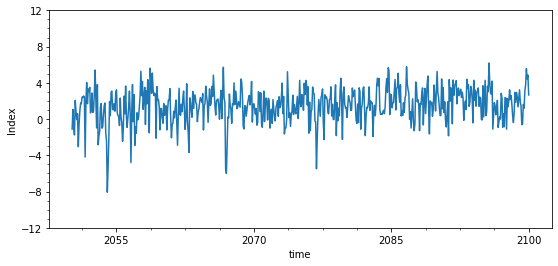

In [10]:
sam.sam.sel(
    time=slice(cftime.DatetimeNoLeap(2050,2,1), 
               cftime.DatetimeNoLeap(2100,1,1))
).plot(x='time', figsize=(9,4))


plt.ylabel('Index')
plt.ylim(-12,12)
plt.yticks(numpy.arange(-12,14,4))
plt.minorticks_on()


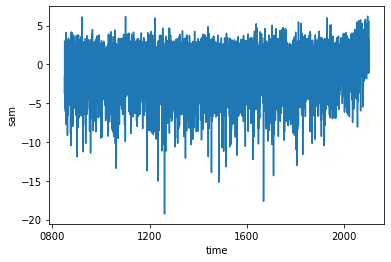

In [11]:
sam.sam.plot()